In [10]:
from b2heavy.TwoPointFunctions.utils     import correlation_diagnostics
from b2heavy.TwoPointFunctions.types2pts import CorrelatorIO, plot_effective_coeffs
from b2heavy.TwoPointFunctions.fitter    import StagFitter

import numpy             as np
import gvar              as gv
import matplotlib.pyplot as plt

In the following section, we set all the parameter for the analysis

In [11]:
# Correlator specifics
ENSEMBLE = 'MediumCoarse'
MESON    = 'D'
MOMENTUM = '100'

DATA_DIR = '/Users/pietro/code/data_analysis/BtoD/Alex/'

BINSIZE  = 13
SMSLIST  = ['1S-1S','d-d','d-1S']

# Correlation matrix specifics
DIAG   = False
BLOCK  = False
SCALE  = True
SHRINK = True
SVD    = 0.01

# Specifics of the analysis
TRANGE_EFF = (13,19) 
TRANGE     = (5,19)
NSTATES    = 3
WPRIORS    = False
JKFIT      = False

In the following cell, we initialize the objects of `b2heavy` that read the data and format them

In [12]:
io   = CorrelatorIO(ENSEMBLE,MESON,MOMENTUM,PathToDataDir=DATA_DIR)
stag = StagFitter(
    io       = io,
    jkBin    = BINSIZE,
    smearing = SMSLIST
)

We also initialize the instruction to build the covariance matrix

In [13]:
cov_specs = dict(
    diag   = DIAG  ,
    block  = BLOCK ,
    scale  = SCALE ,
    shrink = SHRINK,
    cutsvd = SVD   
)

In the following, we calculate and plot effective mass

In [14]:
effm,effa = stag.meff(TRANGE_EFF,verbose=True,**cov_specs)

Least Square Fit:
  chi2/dof [dof] = 0.88 [21]    Q = 0.61    logGBF = 74.712

Parameters:
          const   1.2018 (27)     [ 1.2036 (67) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10*,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit:
  chi2/dof [dof] = 0.86 [21]    Q = 0.64    logGBF = 88.774

Parameters:
('1S-1S', 'Unpol')     2.876 (11)      [   2.877 (13) ]  
 ('d-1S', 'Unpol')    0.4842 (20)      [  0.4827 (36) ]  
  ('d-d', 'Unpol')   0.08225 (36)      [ 0.08200 (56) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10*,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf



/Users/pietro/opt/anaconda3/envs/stat/lib/python3.11/site-packages/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in sqrt
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )


/Users/pietro/opt/anaconda3/envs/stat/lib/python3.11/site-packages/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in sqrt
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )


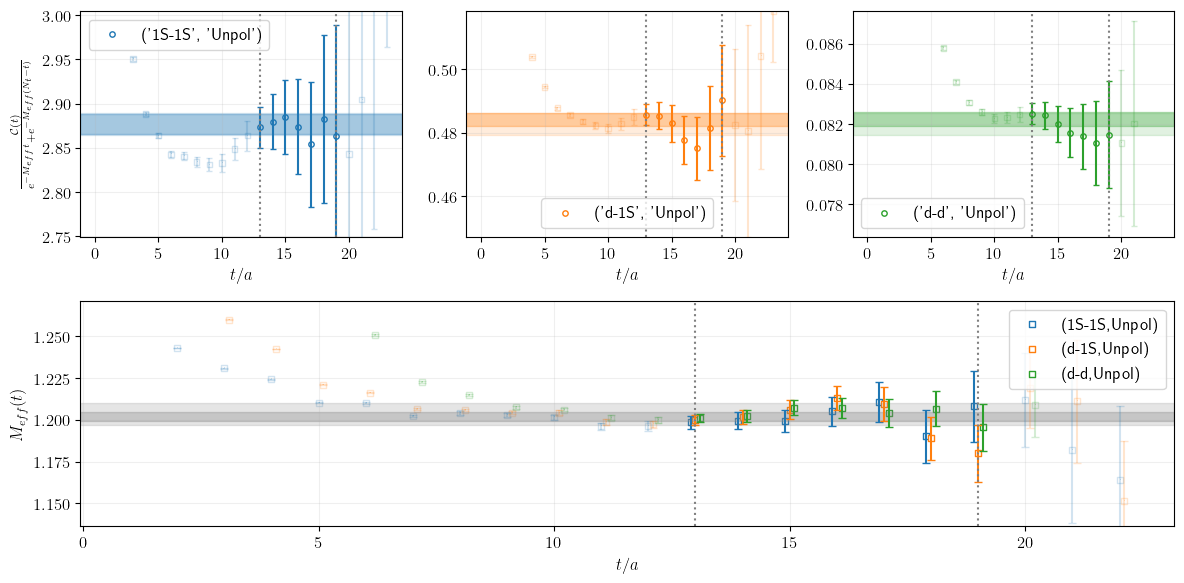

In [15]:
toplot = stag.meff(TRANGE_EFF,**cov_specs,plottable=True)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

plt.figure(figsize=(12, 6 if len(stag.keys)/len(SMSLIST)==1 else 8))
plot_effective_coeffs(TRANGE_EFF,*toplot)

plt.tight_layout()
plt.show()

Here we set priors

In [16]:
priors = stag.priors(NSTATES,Meff=effm,Aeff=effa)

# if you want to change the priors you can do, for example
# priors['E'][0] = gv.gvar('1.007(1)')

priors

{'E': [1.20(13), -1.29(54), -0.8(1.0), -0.8(1.0), -0.8(1.0), -0.8(1.0)],
 'Z_1S_Unpol': [0.53(20), -1.2(1.2), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)],
 'Z_d-1S_Unpol': [0.5(1.7), 0.5(1.7), 0.5(1.7), 0.5(1.7)],
 'Z_d_Unpol': [-1.25(22), -2.5(1.5), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)]}

Now we perform the fit

In [17]:
fit = stag.fit(
    Nstates = NSTATES,
    trange  = TRANGE,
    priors  = priors,
    verbose = True,
    **cov_specs
)

---------- 3+3 fit in (5, 19) for mes: D of ens: MediumCoarse for mom: 100 --------------
Least Square Fit:
  chi2/dof [dof] = 0.62 [45]    Q = 0.98    logGBF = 807.16

Parameters:
            E 0   1.1988 (29)     [  1.20 (13) ]  
              1    -2.05 (22)     [ -1.29 (54) ]  *
              2    -1.26 (75)     [ -0.8 (1.0) ]  
              3    -0.90 (45)     [ -0.8 (1.0) ]  
              4    -0.54 (29)     [ -0.8 (1.0) ]  
              5    -0.90 (71)     [ -0.8 (1.0) ]  
   Z_1S_Unpol 0    0.494 (22)     [  0.53 (20) ]  
              1    -0.54 (13)     [ -1.2 (1.2) ]  
              2     0.65 (22)     [  0.5 (1.5) ]  
              3     0.2 (1.4)     [  0.5 (1.5) ]  
              4     0.4 (2.5)     [  0.5 (3.0) ]  
              5     2.6 (1.8)     [  0.5 (3.0) ]  
 Z_d-1S_Unpol 0     0.31 (13)     [  0.5 (1.7) ]  
              1     0.35 (21)     [  0.5 (1.7) ]  
              2     0.81 (21)     [  0.5 (1.7) ]  
              3     0.67 (57)     [  0.5 (1.7) ]  
  

In [18]:
fitres = stag.fit_result(
    NSTATES,
    TRANGE,
    verbose = True,
    priors  = priors if WPRIORS else None
)

# ---------- 3+3 fit in (5, 19) for mes: D of ens: MediumCoarse for mom: 100 --------------
Least Square Fit:
  chi2/dof [dof] = 0.62 [45]    Q = 0.98    logGBF = 807.16

Parameters:
            E 0   1.1988 (29)     [  1.20 (13) ]  
              1    -2.05 (22)     [ -1.29 (54) ]  *
              2    -1.26 (75)     [ -0.8 (1.0) ]  
              3    -0.90 (45)     [ -0.8 (1.0) ]  
              4    -0.54 (29)     [ -0.8 (1.0) ]  
              5    -0.90 (71)     [ -0.8 (1.0) ]  
   Z_1S_Unpol 0    0.494 (22)     [  0.53 (20) ]  
              1    -0.54 (13)     [ -1.2 (1.2) ]  
              2     0.65 (22)     [  0.5 (1.5) ]  
              3     0.2 (1.4)     [  0.5 (1.5) ]  
              4     0.4 (2.5)     [  0.5 (3.0) ]  
              5     2.6 (1.8)     [  0.5 (3.0) ]  
 Z_d-1S_Unpol 0     0.31 (13)     [  0.5 (1.7) ]  
              1     0.35 (21)     [  0.5 (1.7) ]  
              2     0.81 (21)     [  0.5 (1.7) ]  
              3     0.67 (57)     [  0.5 (1.7) ]  


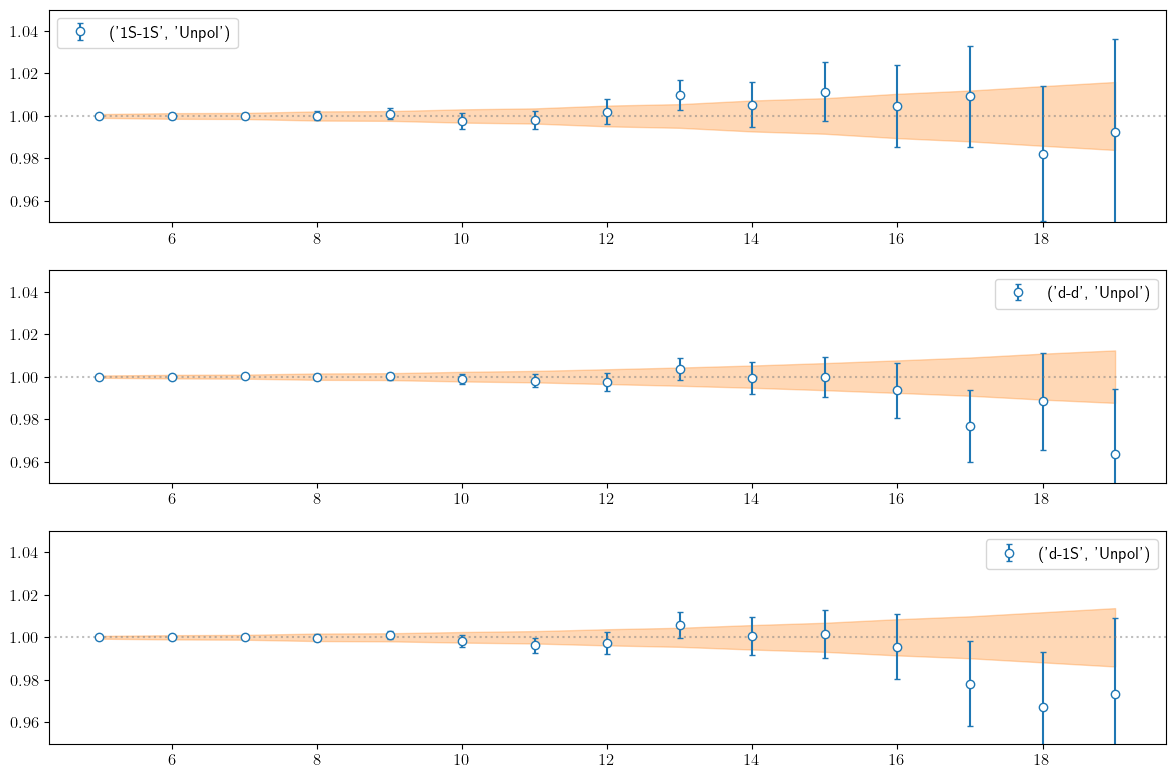

In [19]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

npol = len(stag.keys)//len(SMSLIST)
f, ax = plt.subplots(3,npol,figsize=(12,8))
stag.plot_fit(ax,NSTATES,TRANGE)

plt.tight_layout()

In [39]:
from b2heavy.TwoPointFunctions.utils import p_value

chi2  = float(fitres['chi2'])
nconf = stag.data.shape[-2]
ndof  = len(fit.y) - sum([len(priors[k]) for k in priors]) 

p_value(chi2,nconf,ndof)

0.4862644652719982